In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

BASE_DIR = Path(os.getcwd()).parent.parent

In [20]:
merged_data_path = Path(os.path.join(f"{BASE_DIR}","backend", "data", "processed", "CLEAN_MERGED_DATASET.csv"))
merged_data = pd.read_csv(merged_data_path)
merged_data['date'] = pd.to_datetime(merged_data['date'])

In [21]:
print(merged_data.columns)
print(merged_data.head())

Index(['Unnamed: 0.1', 'date', 'load', 'Unnamed: 0', 'temperature_2m',
       'relative_humidity_2m', 'apparent_temperature', 'precipitation',
       'pressure_msl', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid',
       'cloud_cover_high', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'wind_speed_10m', 'wind_direction_10m',
       'wind_gusts_10m', 'sunshine_duration'],
      dtype='object')
   Unnamed: 0.1                date     load  Unnamed: 0  temperature_2m  \
0             0 2023-09-01 00:00:00  22602.0           0       26.489000   
1             1 2023-09-01 01:00:00  21934.0           1       26.088999   
2             2 2023-09-01 02:00:00  20796.0           2       25.289000   
3             3 2023-09-01 03:00:00  19475.0           3       25.239000   
4             4 2023-09-01 04:00:00  17492.0           4       25.239000   

   relative_humidity_2m  apparent_temperature  precipitation  pressure_msl  \
0              90.94568             32.514164 

In [22]:
print("Temperature range:", merged_data['temperature_2m'].min(), "to", merged_data['temperature_2m'].max())
print("Load range:", merged_data['load'].min(), "to", merged_data['load'].max())
print("\nBasic correlation:", merged_data['load'].corr(merged_data['temperature_2m']))

Temperature range: 3.389 to 37.489002
Load range: 8661.0 to 29545.0

Basic correlation: 0.7435951380568012


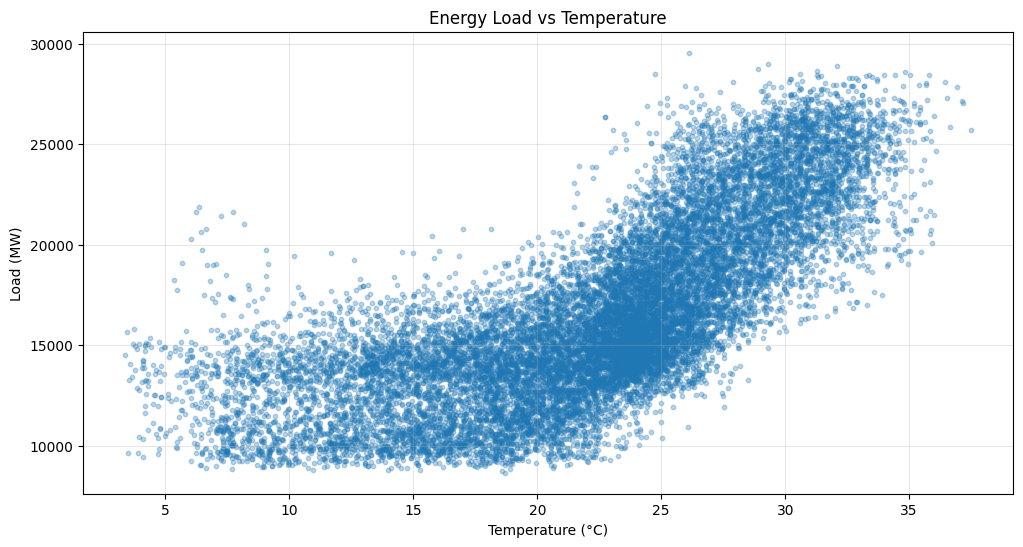

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['temperature_2m'], merged_data['load'], alpha=0.3, s=10)
plt.xlabel('Temperature (°C)')
plt.ylabel('Load (MW)')
plt.title('Energy Load vs Temperature')
plt.grid(True, alpha=0.3)
plt.show()

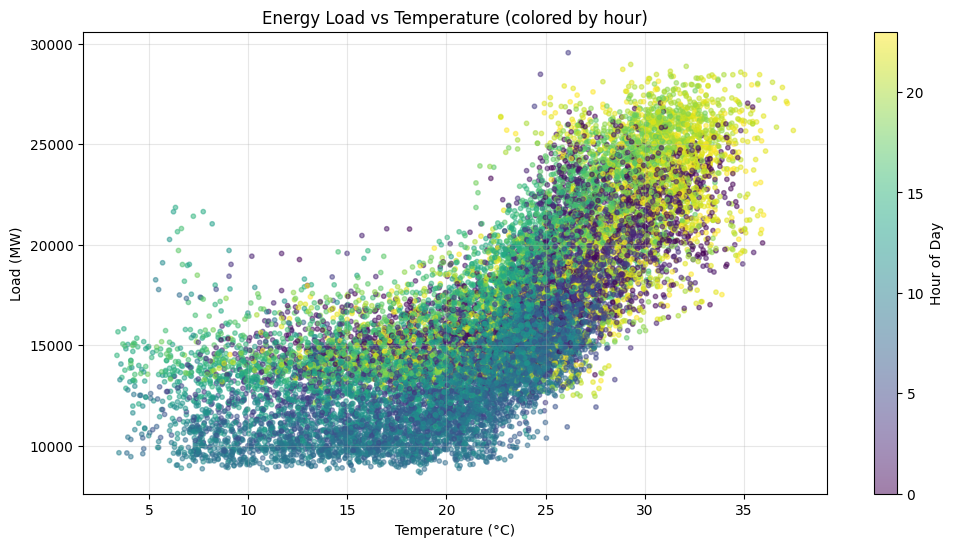

In [24]:
plt.figure(figsize=(12, 6))
merged_data['hour'] = merged_data['date'].dt.hour
scatter = plt.scatter(merged_data['temperature_2m'],
                    merged_data['load'],
                    c=merged_data['hour'],
                    cmap='viridis',
                    alpha=0.5,
                    s=10)
plt.colorbar(scatter, label='Hour of Day')
plt.xlabel('Temperature (°C)')
plt.ylabel('Load (MW)')
plt.title('Energy Load vs Temperature (colored by hour)')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
temp_bins = pd.cut(merged_data['temperature_2m'], bins=10)
binned_anaylsis = merged_data.groupby(temp_bins)['load'].agg(['mean', 'std', 'count'])
print(binned_anaylsis)

                          mean          std  count
temperature_2m                                    
(3.355, 6.799]    13117.589474  2443.971772    190
(6.799, 10.209]   12355.104863  2271.996595    658
(10.209, 13.619]  12659.510184  2130.198005   1031
(13.619, 17.029]  12879.251390  2206.491610   1619
(17.029, 20.439]  13390.811625  2291.373339   2357
(20.439, 23.849]  15036.401330  2522.668550   3608
(23.849, 27.259]  17729.942012  3110.321116   4156
(27.259, 30.669]  21443.282095  2959.477646   2368
(30.669, 34.079]  23627.732031  2453.136955   1280
(34.079, 37.489]  24135.721088  2621.580700    147


/var/folders/br/j5ntzqd52vj_3f8_n_110t_80000gn/T/ipykernel_47780/669447330.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_anaylsis = merged_data.groupby(temp_bins)['load'].agg(['mean', 'std', 'count'])


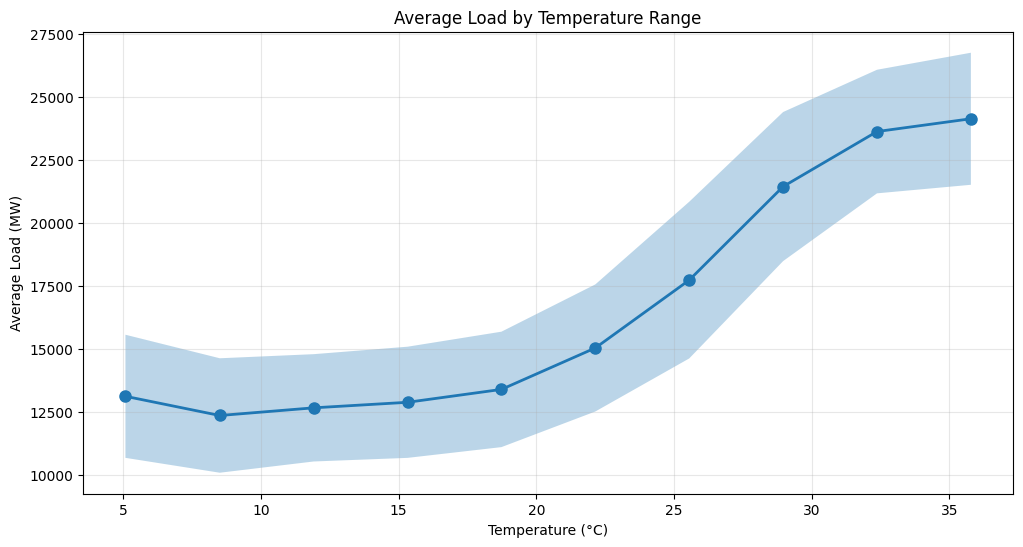

In [26]:
plt.figure(figsize=(12,6))
bin_centers = [interval.mid for interval in binned_anaylsis.index]
plt.plot(bin_centers, binned_anaylsis['mean'], marker='o', linewidth=2, markersize=8)
plt.fill_between(bin_centers, binned_anaylsis['mean'] - binned_anaylsis['std'], binned_anaylsis['mean'] + binned_anaylsis['std'], alpha=0.3)
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Load (MW)')
plt.title('Average Load by Temperature Range')
plt.grid(True, alpha=0.3)
plt.show()

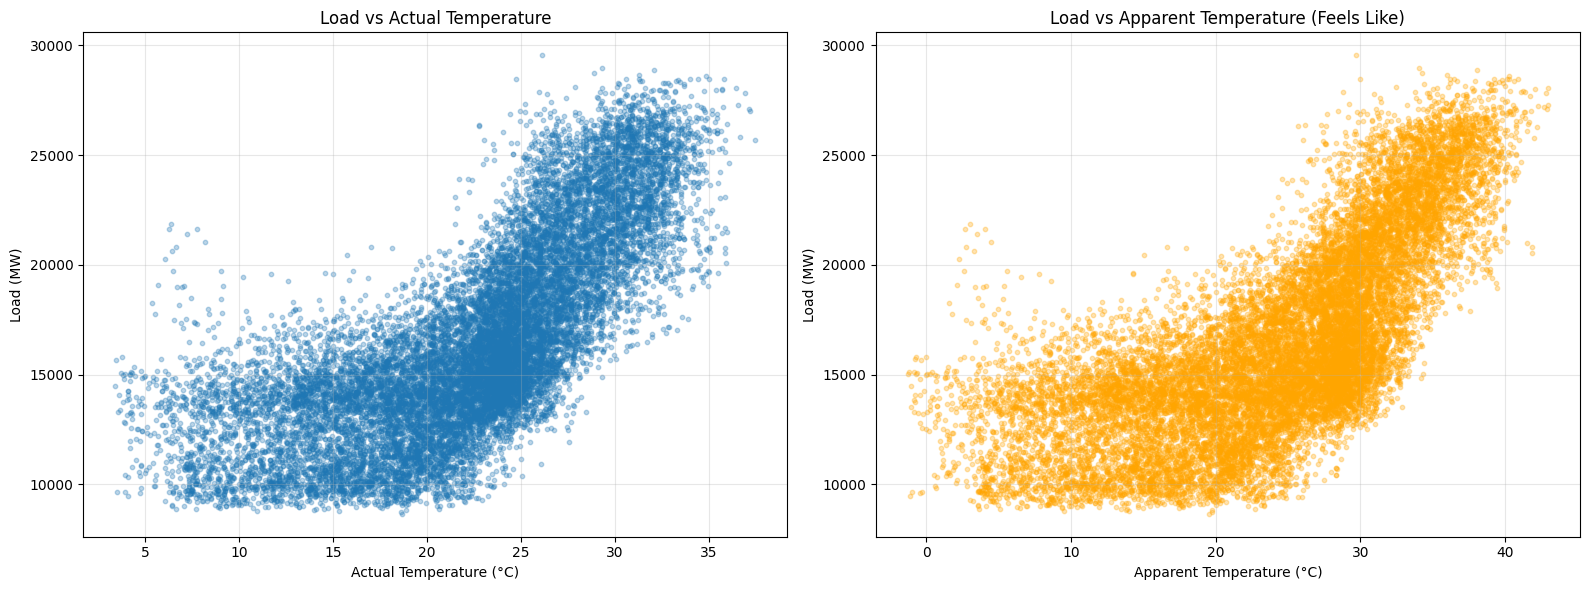

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].scatter(merged_data['temperature_2m'], merged_data['load'], alpha=0.3, s=10)
axes[0].set_xlabel('Actual Temperature (°C)')
axes[0].set_ylabel('Load (MW)')
axes[0].set_title('Load vs Actual Temperature')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(merged_data['apparent_temperature'], merged_data['load'], alpha=0.3, s=10, color='orange')
axes[1].set_xlabel('Apparent Temperature (°C)')
axes[1].set_ylabel('Load (MW)')
axes[1].set_title('Load vs Apparent Temperature (Feels Like)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
print("Actual temp correlation:", merged_data['load'].corr(merged_data['temperature_2m']))
print("Apparent temp correlation:", merged_data['load'].corr(merged_data['apparent_temperature']))

Actual temp correlation: 0.7435951380568012
Apparent temp correlation: 0.7245573053990658


# Data Overview and Basic Statistics